In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('sentiment_analysis.csv')

In [ ]:
dataset.shape

(7920, 3)

In [ ]:
dataset.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
dataset.drop(columns={'id'}, inplace=True)

In [ ]:
dataset.rename(columns={'label': 'Sentiment', 'tweet':'Tweet'}, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  7920 non-null   int64 
 1   Tweet      7920 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


In [ ]:
dataset['Tweet'] = dataset['Tweet'].replace(np.nan, '')

In [ ]:
dataset.dropna(inplace=True
               )

In [ ]:
dataset.shape

(7920, 2)

In [ ]:
x = dataset.Tweet
y = dataset.Sentiment

In [ ]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    stemmer = PorterStemmer()
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        stem_word = stemmer.stem(word)  # stemming word
        tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [ ]:
def extract_features(tweet, freqs):
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3))
    x[0,0] = 1

    for word in word_l:
        x[0,1] += freqs.get((word, 1.0),0)
        x[0,2] += freqs.get((word, 0.0),0)
    assert(x.shape == (1, 3))
    return x

In [ ]:
freqs = build_freqs(x, y)

In [ ]:
print(freqs)

{('fingerprint', 0): 4, ('pregnanc', 0): 1, ('test', 0): 11, ('final', 0): 176, ('a', 0): 734, ('transpar', 0): 5, ('silicon', 0): 4, ('case', 0): 297, ('^', 0): 57, ('thank', 0): 183, ('to', 0): 877, ('my', 0): 1230, ('uncl', 0): 4, (':)', 0): 183, ('yay', 0): 64, ('soni', 0): 699, ('xperia', 0): 57, ('s', 0): 107, ('sonyexperia', 0): 2, ('…', 0): 1368, ('we', 0): 160, ('love', 0): 450, ('thi', 0): 460, ('!', 0): 2521, ('would', 0): 95, ('you', 0): 565, ('go', 0): 100, ('?', 0): 298, ('talk', 0): 19, ('makememori', 0): 1, ('unplug', 0): 2, ('relax', 0): 38, ('iphon', 0): 2925, ('smartphon', 0): 75, ('wifi', 0): 32, ('connect', 0): 9, ('...', 0): 721, ("i'm", 0): 147, ('wire', 0): 5, ('i', 0): 1077, ('know', 0): 61, ('georg', 0): 1, ('wa', 0): 68, ('made', 0): 46, ('that', 0): 159, ('way', 0): 35, (';)', 0): 28, ('cute', 0): 262, ('daventri', 0): 1, ('home', 0): 116, ('what', 1): 74, ('amaz', 1): 7, ('servic', 1): 25, ('!', 1): 862, ('appl', 1): 1246, ("won't", 1): 54, ('even', 1): 56,

In [ ]:
tweet = x[0]
extract_features(tweet, freqs)

array([[ 1.,  2., 16.]])

In [ ]:
X = np.zeros((len(x), 3))
for i in range(len(x)):
  try:
    X[i, :]= extract_features(x[i], freqs)
  except KeyError:
    continue


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [ ]:
print(x_train)

[[1.0000e+00 1.2898e+04 1.6824e+04]
 [1.0000e+00 5.2610e+03 7.9140e+03]
 [1.0000e+00 1.4660e+03 4.0830e+03]
 ...
 [1.0000e+00 1.8900e+02 9.4400e+02]
 [1.0000e+00 4.8210e+03 1.1158e+04]
 [1.0000e+00 1.6120e+03 5.5630e+03]]


In [ ]:
print(y_train)

5610    1
3537    1
2347    0
2853    0
727     0
       ..
7183    0
1078    0
3833    0
7287    0
7779    0
Name: Sentiment, Length: 4752, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(x_test)

0.8327020202020202


<Axes: >

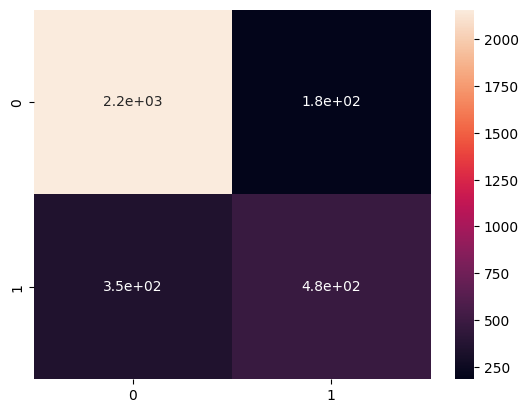

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_pred, y_test))
sns.heatmap(cm, annot=True)